# Assignment: 
## The importance of uniformly distributed random numbers
### A possible solution by Pedro Lind, Oslo, August 2020 

In [1]:
import numpy as np
import scipy
import matplotlib.pylab as plt
import random
import math

## 1. Generate a sample of $10^4$ random numbers for a variable $x$ uniformly distributed between $0$ and $1$.

Generate vector with $N=10^4$ random numbers uniformly distributed between 0 and 1

In [2]:
N = 10000
randnumbersvec = []
for ii in range(N):
    xx = random.uniform(0.,1.)
    randnumbersvec.append(xx)

Plot the histogram

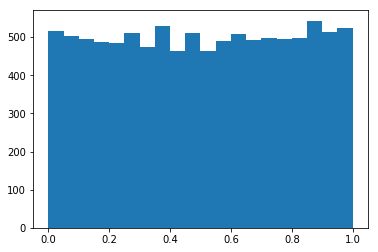

In [3]:
plt.hist(randnumbersvec,bins=20) 
plt.show()

Plot the histogram (alternative):

(array([1.30473265e-05, 5.00047134e-02, 9.99963794e-02, 1.49988045e-01,
       1.99979712e-01, 2.49971378e-01, 2.99963044e-01, 3.49954710e-01,
       3.99946376e-01, 4.49938042e-01, 4.99929708e-01, 5.49921374e-01,
       5.99913040e-01, 6.49904706e-01, 6.99896372e-01, 7.49888038e-01,
       7.99879704e-01, 8.49871370e-01, 8.99863036e-01, 9.49854702e-01,
       9.99846368e-01]), array([1.03017171, 1.00616771, 0.98816471, 0.97616271, 0.97016171,
       1.02417071, 0.94815804, 1.06017671, 0.9281547 , 1.02417071,
       0.92615437, 0.97816304, 1.01816971, 0.98416404, 0.99616604,
       0.99016504, 0.99416571, 1.08618104, 1.02617104, 1.04817471]))
(array([0.        , 0.02500888, 0.07500055, 0.12499221, 0.17498388,
       0.22497554, 0.27496721, 0.32495888, 0.37495054, 0.42494221,
       0.47493387, 0.52492554, 0.57491721, 0.62490887, 0.67490054,
       0.7248922 , 0.77488387, 0.82487554, 0.8748672 , 0.92485887,
       0.97485054, 0.99984637]), array([0.        , 1.03017171, 1.00616771, 0.98

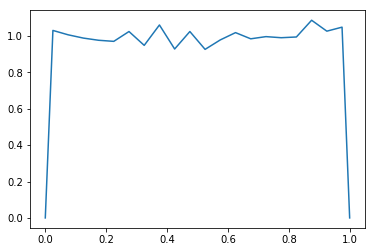

In [4]:
hist, bin_edges = np.histogram(randnumbersvec, bins=20, range=None, normed=None, weights=None, density=True)
bin_mids = np.zeros(len(hist)+2)
new_hist = np.zeros(len(hist)+2)
for ii in range(len(hist)):
    bin_mids[ii+1]=0.5*(bin_edges[ii+1]+bin_edges[ii])
    new_hist[ii+1]=hist[ii]
bin_mids[len(hist)+1]=bin_edges[len(hist)]
new_hist[len(hist)+1]=0.
print(bin_edges,hist)
print(bin_mids,new_hist)
plt.plot(bin_mids,new_hist)

## 2. Implement cumulative density function $F_u(u)$

Derive the explicit expression of 
  \begin{equation}
    F_u(u) = \int_{0}^u \rho(w)dw \, ,
  \end{equation}
  where $\rho(w)$ is an estimate of the probabilty density function in the previous plot.

<b>Answer:</b> $F_u(u)=u$

Implement $F_u(u)$

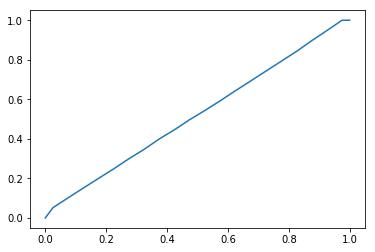

In [5]:
cumul_hist = np.zeros(len(hist)+2)
norm = sum(hist)
for ii in range(len(hist)):
    cumul_hist[ii+1]=cumul_hist[ii]+hist[ii]/float(norm)
cumul_hist[len(hist)+1] = 1.
plt.plot(bin_mids,cumul_hist)

In [ ]:
cumul_hist

## 3. From uniform distribution to the exponential distribution

Consider another probability density function, namely 
$$\rho_e(x)=\exp{(-x)}$$ 
with $x\in [0,\infty)$ (exponential distribution).

Derive the explicit expression of
  \begin{equation}
    F_e(x) = \int_{0}^x \rho_e(y)dy \, .
    \label{exponential}
  \end{equation}

<b>Answer:</b> $F_e(x)=1-\exp{(-x)}$

To change from uniformly distributed numbers $u$ to exponentially distributed numbers $x$, you should impose that $F_u(u)=F_e(x)$ and solve it with respect to $x$:
$$x = -\log{(1-u)}$$
Implementing this yields:

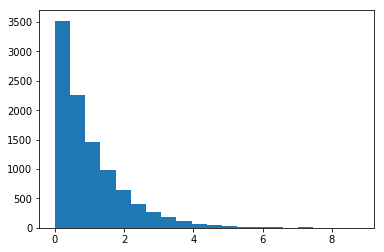

In [6]:
newexprandom = []
for ii in range(len(randnumbersvec)):
    newnumber = -np.log(1-randnumbersvec[ii])
    newexprandom.append(newnumber)
plt.hist(newexprandom,bins=20) 
plt.show()

## From uniform distribution to the normal (Gaussian) distribution

This method is called Box-Muller algorithm.

We consider two independent random variables, $x$ and $y$, which are normal distributed, i.e.~they are Gaussian distributed with zero mean and unit variance:
\begin{aligned}
\rho_g(x) &=& \frac{1}{\sqrt{2\pi}}\exp{(-x^2/2)} \, , \cr
\rho_g(y) &=& \frac{1}{\sqrt{2\pi}}\exp{(-y^2/2)} \, . \nonumber
\end{aligned}
Their associated joint distribution reads
\begin{equation}
\rho_{gg}(x,y) = \frac{1}{2\pi}\exp{\left (-\frac{x^2+y^2}{2} \right )} \, ,
\end{equation}
which has a two-variable cumulative density function:
\begin{equation}
F_{gg}(x,y) = \int_{-\infty}^x\int_{-\infty}^y  \frac{1}{2\pi} \exp{\left (-\frac{w^2+z^2}{2} \right )} dwdz\, .
\end{equation}

Applying polar coordinates, $x=r\cos{\theta}$ and $y=r\sin{\theta}$, yields
\begin{aligned}
F_{gg}(x,y) &= \int_{-\infty}^x\int_{-\infty}^y  \frac{1}{2\pi} \exp{\left (-\frac{w^2+z^2}{2} \right )} dwdz \cr
            &= \int_{0}^{2\pi} d\theta \int_{0}^r 
               \left \vert \frac{\partial(x,y)}{\partial(r^{\prime},\theta)} \right \vert
               \frac{1}{2\pi} \exp{\left (-\frac{(r^{\prime})^2}{2} \right )} dr^{\prime} \cr
            &= \int_{0}^r 
               r^{\prime} 
               \exp{\left (-\frac{(r^{\prime})^2}{2} \right )} dr^{\prime} \cr
            &= 1-\exp{\left (  -\frac{r^2}{2}  \right )}  \equiv F_G(r) \nonumber \, .
\end{aligned}

Imposing now $F_G(r)=F_u(u)$ yields
\begin{equation}
r=\sqrt{-2\log{(1-u)}} \, ,
\end{equation}
where $u$ is the random number betwee 0 and 1.

Hence, the two gaussian variables can now be defined as
\begin{align}
   x &=& \sqrt{-2\log{(1-u_1)}} \cos{(2\pi u_2)}  \cr
   y &=& \sqrt{-2\log{(1-u_1)}} \sin{(2\pi u_2)}  \nonumber \, ,
\end{align}
where we consider that $u_1$ and $u_2$ are two <i>independent</i> uniformly distributed random variables
with values between 0 and 1.

<b>Note:</b> The introduction of a second uniformly distributed variable is to account for the variable
$\theta$ that is a free parameter in our algorithm.

<b>Implementation:</b>

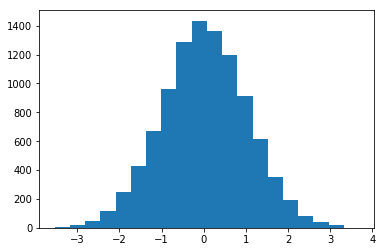

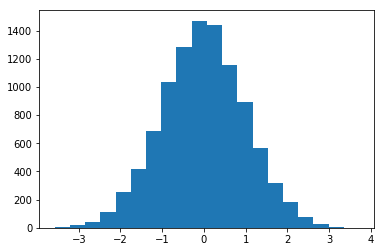

In [7]:
randnumbersvec2 = []
for ii in range(N):
    xx = random.uniform(0.,1.)
    randnumbersvec2.append(xx)
gauss1 = []
gauss2 = []
for ii in range(N):
    newnumber1 = np.sqrt(-2.*np.log(1-randnumbersvec[ii]))*math.cos(2.*math.pi*randnumbersvec2[ii])
    gauss1.append(newnumber1)
    newnumber2 = np.sqrt(-2.*np.log(1-randnumbersvec[ii]))*math.sin(2.*math.pi*randnumbersvec2[ii])
    gauss2.append(newnumber2)
plt.hist(gauss1,bins=20) 
plt.show()
plt.hist(gauss2,bins=20) 
plt.show()